In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas.api.types as ptypes
#import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import t as t_dist
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import pandas as pd
import statsmodels.api as sm
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, r2_score
from scipy.stats import f as f_dist
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [2]:
df = pd.read_csv('data_final.csv')

In [3]:
import pandas as pd
df = df.dropna(subset=['bpm', 'energy', 'danceability', 'loudness',
                        'valence', 'length', 'acousticness', 'artist_seperation'])

In [4]:
def mode_language(series):
    non_null = series.dropna()
    if non_null.empty:
        return None
    else:
        return non_null.mode().iloc[0]

artist_mode = df.groupby('artist')['language'].apply(mode_language)

def impute_language(row):
    if pd.isnull(row['language']):
        return artist_mode.get(row['artist'], None)
    else:
        return row['language']

df['language'] = df.apply(impute_language, axis=1)

In [5]:
missing_rows = df[df.isnull().any(axis=1)]
print(f'The percentage of entries with missing data: {len(missing_rows)/len(df) * 100:.2f}%')
print("- " * 30)
for column in df.columns:
    missing_count = df[column].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    print(f"  Column '{column}': \n       Missing values count: {missing_count}, {missing_percentage:.2f}% missing\n")

The percentage of entries with missing data: 39.23%
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
  Column 'Unnamed: 0': 
       Missing values count: 0, 0.00% missing

  Column 'track_id': 
       Missing values count: 0, 0.00% missing

  Column 'artist': 
       Missing values count: 0, 0.00% missing

  Column 'song': 
       Missing values count: 0, 0.00% missing

  Column 'release_date': 
       Missing values count: 20, 0.59% missing

  Column 'total_weeks': 
       Missing values count: 0, 0.00% missing

  Column 'peak_position': 
       Missing values count: 0, 0.00% missing

  Column 'peak_streams': 
       Missing values count: 0, 0.00% missing

  Column 'total_streams': 
       Missing values count: 0, 0.00% missing

  Column 'release_month': 
       Missing values count: 20, 0.59% missing

  Column 'release_season': 
       Missing values count: 20, 0.59% missing

  Column 'first_peak_date': 
       Missing values count: 0, 0.00% missing

  Column 'peak_season

In [6]:
import pandas as pd
df = df.dropna(subset=['language'])

In [7]:
df['language'].unique()

array(['Ukrainian', 'English', 'Russian', 'German', 'Esperanto',
       'Portuguese', 'Italian', 'Bulgarian', 'Swahili', 'Spanish',
       'French', 'Polish', 'Korean', 'Indonesian', 'Japanese', 'Dutch',
       'Finnish', 'Albanian', 'Tagalog', 'Latin', 'Slovenian', 'Bosnian',
       'Romanian', 'Lithuanian', 'Catalan', 'Swedish', 'Turkish',
       'Chinese', 'Croatian'], dtype=object)

In [8]:
df['english_lang'] = (df['language'] == 'English').astype(int)
df['ukrainian_lang'] = (df['language'] == 'Ukrainian').astype(int)
df['russian_lang'] = (df['language'] == 'Russian').astype(int)
df['other_lang'] = (
    (df['language'] != 'Russian') &
    (df['language'] != 'Ukrainian') &
    (df['language'] != 'English')
).astype(int)

In [9]:
df['fall_release'] = (df['release_season'] == 'Fall').astype(int)
df['spring_release'] = (df['release_season'] == 'Spring').astype(int)
df['summer_release'] = (df['release_season'] == 'Summer').astype(int)
df['winter_release'] = (df['release_season'] == 'Winter').astype(int)
df.head(10)

,Unnamed: 0,track_id,artist,song,release_date,total_weeks,peak_position,peak_streams,total_streams,release_month,...,artist_seperation,debut_position,english_lang,ukrainian_lang,russian_lang,other_lang,fall_release,spring_release,summer_release,winter_release
0,0,61BaxM1NIcadLu3gtWm2uT,sadsvit,силуети,2022-10-28,126,1,263673,17102909,10.0,...,61.0,1,0,1,0,0,1,0,0,0
1,1,2QjOHCTQ1Jl3zawyYOpxh6,the neighbourhood,sweater weather,2013-04-22,234,16,75675,12393368,4.0,...,91.0,171,1,0,0,0,0,1,0,0
2,2,4MQmxIxM5CXKjdq4IrCWhd,sadsvit,касета,2021-12-13,154,1,296336,11790369,12.0,...,61.0,53,0,1,0,0,0,0,0,1
3,3,6gtK39SLszESqJFu2SkId3,wellboy,додому,2022-12-16,117,5,115203,10613534,12.0,...,54.0,79,0,1,0,0,0,0,0,1
4,4,66Xj2OpnDALdW0G509b9yY,yaktak,погляд,2022-10-13,108,1,171097,9534146,10.0,...,54.0,57,0,1,0,0,1,0,0,0
5,5,21LIoC4ZxT3F8xq9gidNbX,xxxmanera,never broke again,2022-04-08,145,1,129007,9524035,4.0,...,60.0,96,1,0,0,0,0,1,0,0
6,6,6bCLkzoE3agC7Ws9NxVxIn,krbk,крепче,2016-01-05,118,8,129377,9492031,1.0,...,63.0,184,0,0,1,0,0,0,0,1
7,7,1N8TTK1Uoy7UvQNUazfUt5,thxsomch,spit in my face!,2022-12-20,113,1,241572,9187236,12.0,...,80.0,100,1,0,0,0,0,0,0,1
8,8,2GxrNKugF82CnoRFbQfzPf,artemas,i like the way you kiss me,2024-03-19,54,1,509776,9051129,3.0,...,84.0,107,1,0,0,0,0,1,0,0
9,9,0vByMmR3Y8MBorEEE5Pmie,parfeniuk,відриваючись,2023-05-03,100,5,165999,9034842,5.0,...,56.0,77,0,1,0,0,0,1,0,0


In [10]:
df['top10'] = (df['peak_position'] < 11).astype(int)
df.head(10)

,Unnamed: 0,track_id,artist,song,release_date,total_weeks,peak_position,peak_streams,total_streams,release_month,...,debut_position,english_lang,ukrainian_lang,russian_lang,other_lang,fall_release,spring_release,summer_release,winter_release,top10
0,0,61BaxM1NIcadLu3gtWm2uT,sadsvit,силуети,2022-10-28,126,1,263673,17102909,10.0,...,1,0,1,0,0,1,0,0,0,1
1,1,2QjOHCTQ1Jl3zawyYOpxh6,the neighbourhood,sweater weather,2013-04-22,234,16,75675,12393368,4.0,...,171,1,0,0,0,0,1,0,0,0
2,2,4MQmxIxM5CXKjdq4IrCWhd,sadsvit,касета,2021-12-13,154,1,296336,11790369,12.0,...,53,0,1,0,0,0,0,0,1,1
3,3,6gtK39SLszESqJFu2SkId3,wellboy,додому,2022-12-16,117,5,115203,10613534,12.0,...,79,0,1,0,0,0,0,0,1,1
4,4,66Xj2OpnDALdW0G509b9yY,yaktak,погляд,2022-10-13,108,1,171097,9534146,10.0,...,57,0,1,0,0,1,0,0,0,1
5,5,21LIoC4ZxT3F8xq9gidNbX,xxxmanera,never broke again,2022-04-08,145,1,129007,9524035,4.0,...,96,1,0,0,0,0,1,0,0,1
6,6,6bCLkzoE3agC7Ws9NxVxIn,krbk,крепче,2016-01-05,118,8,129377,9492031,1.0,...,184,0,0,1,0,0,0,0,1,1
7,7,1N8TTK1Uoy7UvQNUazfUt5,thxsomch,spit in my face!,2022-12-20,113,1,241572,9187236,12.0,...,100,1,0,0,0,0,0,0,1,1
8,8,2GxrNKugF82CnoRFbQfzPf,artemas,i like the way you kiss me,2024-03-19,54,1,509776,9051129,3.0,...,107,1,0,0,0,0,1,0,0,1
9,9,0vByMmR3Y8MBorEEE5Pmie,parfeniuk,відриваючись,2023-05-03,100,5,165999,9034842,5.0,...,77,0,1,0,0,0,1,0,0,1


In [11]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['after2022'] = (df['release_date'] > pd.to_datetime('2022-02-24')).astype(int)

In [12]:
df.head()

,Unnamed: 0,track_id,artist,song,release_date,total_weeks,peak_position,peak_streams,total_streams,release_month,...,english_lang,ukrainian_lang,russian_lang,other_lang,fall_release,spring_release,summer_release,winter_release,top10,after2022
0,0,61BaxM1NIcadLu3gtWm2uT,sadsvit,силуети,2022-10-28,126,1,263673,17102909,10.0,...,0,1,0,0,1,0,0,0,1,1
1,1,2QjOHCTQ1Jl3zawyYOpxh6,the neighbourhood,sweater weather,2013-04-22,234,16,75675,12393368,4.0,...,1,0,0,0,0,1,0,0,0,0
2,2,4MQmxIxM5CXKjdq4IrCWhd,sadsvit,касета,2021-12-13,154,1,296336,11790369,12.0,...,0,1,0,0,0,0,0,1,1,0
3,3,6gtK39SLszESqJFu2SkId3,wellboy,додому,2022-12-16,117,5,115203,10613534,12.0,...,0,1,0,0,0,0,0,1,1,1
4,4,66Xj2OpnDALdW0G509b9yY,yaktak,погляд,2022-10-13,108,1,171097,9534146,10.0,...,0,1,0,0,1,0,0,0,1,1


In [15]:
language_dummy_columns = ['english_lang', 'ukrainian_lang', 'other_lang']

time_indicator_column = 'after2022'

for lang_col in language_dummy_columns:
    interaction_col_name = f"{lang_col}_x_{time_indicator_column}" # e.g., 'english_lang_x_after2022'

    if lang_col in df.columns and time_indicator_column in df.columns:
        df[interaction_col_name] = df[lang_col] * df[time_indicator_column]
        print(f" -> Created column: '{interaction_col_name}'")
    else:
        print(f" -> Could not create interaction for '{lang_col}'. Check source column names.")

new_interaction_cols = [f"{lang_col}_x_{time_indicator_column}" for lang_col in language_dummy_columns if f"{lang_col}_x_{time_indicator_column}" in df.columns]

 -> Created column: 'english_lang_x_after2022'
 -> Created column: 'ukrainian_lang_x_after2022'
 -> Created column: 'other_lang_x_after2022'


In [16]:
df['artist_seperation_x_english_lang'] = df['artist_seperation']*df['english_lang']

In [17]:
def select_model(data, columns, dependant_var_name, intercept=True):
    y = data[dependant_var_name]
    X = data[columns]
    if intercept:
        X = sm.add_constant(X)
    best_model = sm.Logit(endog=y, exog=X).fit()
    aic_lst = []
    for col in columns:
        temp_x = X.drop(col, axis=1)
        temp_model = sm.Logit(endog=y, exog=temp_x).fit()
        curr_aic = temp_model.aic
        aic_lst.append({"dropped": col, "model_AIC": curr_aic})
        if curr_aic <= best_model.aic:
            best_model = temp_model
    return pd.DataFrame(aic_lst).style.background_gradient(cmap='viridis').highlight_min(color="red", subset=["model_AIC"]), best_model

x_cols = ['bpm', 'energy','danceability', 'loudness', 'valence', 'length', 'acousticness', 'artist_seperation', 'ukrainian_lang', 'english_lang', 'other_lang', 'spring_release', 'winter_release', 'summer_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())


Optimization terminated successfully.
         Current function value: 0.320688
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321007
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323203
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323516
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320865
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320796
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321767
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323661
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.346726
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320720
  

,dropped,model_AIC
0,bpm,2145.092687
1,energy,2159.506352
2,danceability,2161.559094
3,loudness,2144.159011
4,valence,2143.708187
5,length,2150.078288
6,acousticness,2162.511137
7,artist_seperation,2313.912452
8,ukrainian_lang,2143.206415
9,english_lang,2148.103502


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3263
Method:                           MLE   Df Model:                           18
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.1098
Time:                        13:13:01   Log-Likelihood:                -1052.6
converged:                       True   LL-Null:                       -1182.5
Covariance Type:            nonrobust   LLR p-value:                 8.404e-45
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.4383      0.911     -5.967      0.000      -7.225      -3.652
bpm                                  0.0033      0.002      1.449

In [18]:
x_cols = ['bpm', 'energy','danceability', 'loudness', 'valence', 'length', 'acousticness', 'artist_seperation', 'ukrainian_lang', 'english_lang', 'other_lang', 'spring_release', 'winter_release', 'summer_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.320719
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323209
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323588
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320892
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320825
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321813
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323668
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.346800
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320748
  

,dropped,model_AIC
0,bpm,2143.306961
1,energy,2157.546452
2,danceability,2160.033238
3,loudness,2142.334200
4,valence,2141.898520
5,length,2148.380573
6,acousticness,2160.557064
7,artist_seperation,2312.395996
8,ukrainian_lang,2141.390081
9,english_lang,2146.349986


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3264
Method:                           MLE   Df Model:                           17
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.1098
Time:                        13:13:17   Log-Likelihood:                -1052.7
converged:                       True   LL-Null:                       -1182.5
Covariance Type:            nonrobust   LLR p-value:                 2.308e-45
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.4583      0.911     -5.993      0.000      -7.243      -3.673
bpm                                  0.0033      0.002      1.477

In [19]:
x_cols = ['bpm', 'energy','danceability', 'loudness', 'valence', 'length', 'acousticness', 'artist_seperation', 'english_lang', 'other_lang', 'spring_release', 'winter_release', 'summer_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.320748
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321081
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323232
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323668
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320917
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320846
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321907
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323720
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.346926
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321542
  

,dropped,model_AIC
0,bpm,2141.577466
1,energy,2155.696899
2,danceability,2158.557858
3,loudness,2140.498131
4,valence,2140.035926
5,length,2147.000718
6,acousticness,2158.897980
7,artist_seperation,2311.219404
8,english_lang,2144.599066
9,other_lang,2197.649864


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3265
Method:                           MLE   Df Model:                           16
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.1096
Time:                        13:13:31   Log-Likelihood:                -1052.8
converged:                       True   LL-Null:                       -1182.5
Covariance Type:            nonrobust   LLR p-value:                 6.460e-46
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.4987      0.908     -6.057      0.000      -7.278      -3.719
bpm                                  0.0033      0.002      1.491

In [ ]:
x_cols = ['bpm', 'energy','danceability', 'loudness', 'valence', 'length', 'acousticness', 'artist_seperation', 'english_lang', 'other_lang', 'spring_release', 'winter_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.320793
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321133
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323282
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323702
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320958
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320888
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323779
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.347067
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321586
  

,dropped,model_AIC
0,bpm,2139.914564
1,energy,2154.021015
2,danceability,2156.778529
3,loudness,2138.765468
4,valence,2138.310849
5,length,2145.241349
6,acousticness,2157.285940
7,artist_seperation,2310.145559
8,english_lang,2142.890807
9,other_lang,2196.346588


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3266
Method:                           MLE   Df Model:                           15
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.1094
Time:                        09:11:48   Log-Likelihood:                -1053.2
converged:                       True   LL-Null:                       -1182.5
Covariance Type:            nonrobust   LLR p-value:                 2.049e-46
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.5874      0.902     -6.192      0.000      -7.356      -3.819
bpm                                  0.0035      0.002      1.558

In [20]:
x_cols = ['bpm', 'energy','danceability', 'loudness', 'length', 'acousticness', 'artist_seperation', 'english_lang', 'other_lang', 'spring_release', 'winter_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.320888
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321259
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323290
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324700
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.322076
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323793
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.347308
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321673
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329810
  

,dropped,model_AIC
0,bpm,2138.743738
1,energy,2152.074300
2,danceability,2161.332191
3,loudness,2137.410654
4,length,2144.106312
5,acousticness,2155.377502
6,artist_seperation,2309.731957
7,english_lang,2141.462474
8,other_lang,2194.874083
9,spring_release,2144.434635


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3267
Method:                           MLE   Df Model:                           14
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.1089
Time:                        13:13:46   Log-Likelihood:                -1053.7
converged:                       True   LL-Null:                       -1182.5
Covariance Type:            nonrobust   LLR p-value:                 7.879e-47
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -6.0778      0.773     -7.865      0.000      -7.592      -4.563
bpm                                  0.0035      0.002      1.545

In [21]:
x_cols = ['bpm', 'energy','danceability', 'length', 'acousticness', 'artist_seperation', 'english_lang', 'other_lang', 'spring_release', 'winter_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321420
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323801
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.325138
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.322255
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324169
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.347646
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321824
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329852
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.322297
  

,dropped,model_AIC
0,bpm,2137.804157
1,energy,2153.432180
2,danceability,2162.203716
3,length,2143.279737
4,acousticness,2155.847635
5,artist_seperation,2309.948749
6,english_lang,2140.455893
7,other_lang,2193.146348
8,spring_release,2143.556627
9,winter_release,2136.964581


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3268
Method:                           MLE   Df Model:                           13
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.1082
Time:                        13:13:50   Log-Likelihood:                -1054.5
converged:                       True   LL-Null:                       -1182.5
Covariance Type:            nonrobust   LLR p-value:                 3.639e-47
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -6.1232      0.772     -7.929      0.000      -7.637      -4.610
bpm                                  0.0034      0.002      1.515

In [23]:
x_cols = ['bpm', 'energy','danceability', 'length', 'acousticness', 'artist_seperation', 'english_lang', 'other_lang', 'spring_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.321293
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321643
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324030
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.325442
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.322487
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324367
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.347732
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.322045
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.330072
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.322325
  

,dropped,model_AIC
0,bpm,2137.264718
1,energy,2152.930944
2,danceability,2162.201871
3,length,2142.803678
4,acousticness,2155.145674
5,artist_seperation,2308.514697
6,english_lang,2139.905626
7,other_lang,2192.589368
8,spring_release,2141.741918
9,after2022,2143.195319


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3268
Method:                           MLE   Df Model:                           13
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.1082
Time:                        13:14:33   Log-Likelihood:                -1054.5
converged:                       True   LL-Null:                       -1182.5
Covariance Type:            nonrobust   LLR p-value:                 3.639e-47
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -6.1232      0.772     -7.929      0.000      -7.637      -4.610
bpm                                  0.0034      0.002      1.515

In [24]:
def plot_roc_curve(y_true, y_pred_prob):

    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = round(roc_auc_score(y_true=y_true, y_score=y_pred_prob),2)

    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label=f'model (area = {auc})')
    plt.plot([0, 1], [0, 1],'r--', label='random baseline (area = 0.5)')

    id_x = pd.Series(abs(tpr - fpr), index=fpr).idxmax()
    plt.axvline(x=id_x, linestyle='dashed', color='black', label='maximizes classifiers performance')
    id_y = pd.Series(abs(tpr - fpr), index=tpr).idxmax()
    plt.axhline(y=id_y, linestyle='dashed', color='black', label='maximizes classifiers performance')

    optimal_threshold_index = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_threshold_index]
    print('Optimal Threshold :', optimal_threshold)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for y_top10')
    plt.legend(loc=(1.05,0.6))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.show()

In [25]:
import statsmodels.formula.api as smf

logistic_model = smf.logit('top10 ~ bpm + energy + danceability + length + acousticness + artist_seperation + english_lang + other_lang + spring_release + after2022 + english_lang_x_after2022 + ukrainian_lang_x_after2022 + artist_seperation_x_english_lang', data=df)
logistic_results = logistic_model.fit()
print(logistic_results.summary())

aic_value = logistic_results.aic
bic_value = logistic_results.bic

print(f"\nAIC: {aic_value}")
print(f"BIC: {bic_value}")

Optimization terminated successfully.
         Current function value: 0.321293
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3268
Method:                           MLE   Df Model:                           13
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.1082
Time:                        13:16:31   Log-Likelihood:                -1054.5
converged:                       True   LL-Null:                       -1182.5
Covariance Type:            nonrobust   LLR p-value:                 3.639e-47
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -6.1232      0.772     -7.92

In [26]:
import random
random_indices = random.sample(range(len(df)), 5)
indices_to_calculate = set(random_indices)

independent_vars = ['bpm', 'energy','danceability', 'length', 'acousticness', 'artist_seperation', 'english_lang', 'other_lang', 'spring_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'artist_seperation_x_english_lang']
coefficients = logistic_results.params

def logit(z):
    return np.exp(z) / (1+np.exp(z))

for index, row in df.iterrows():
    if index in indices_to_calculate:
        linear_predictor = coefficients['Intercept']
        for var in independent_vars:
            linear_predictor += coefficients[var] * row[var]

        probability = logit(linear_predictor)
        print(f"Observation {index}: Predicted Probability = {probability:.4f}")

Observation 2: Predicted Probability = 0.3577
Observation 16: Predicted Probability = 0.1334
Observation 185: Predicted Probability = 0.0109
Observation 460: Predicted Probability = 0.1319
Observation 780: Predicted Probability = 0.1453


In [29]:
from sklearn.metrics import confusion_matrix

df['top10_pred'] = logistic_results.predict(df[independent_vars])
cm = confusion_matrix(df['top10'], (df['top10_pred'] >= 0.10883966312493101).astype(int))

confusion_matrix_df = pd.DataFrame(cm, index=['actual_0', 'actual_1'], columns=['predicted_0', 'predicted_1'])
confusion_matrix_df.T

,actual_0,actual_1
predicted_0,1836,104
predicted_1,1063,279


Optimal Threshold : 0.10883966312493101


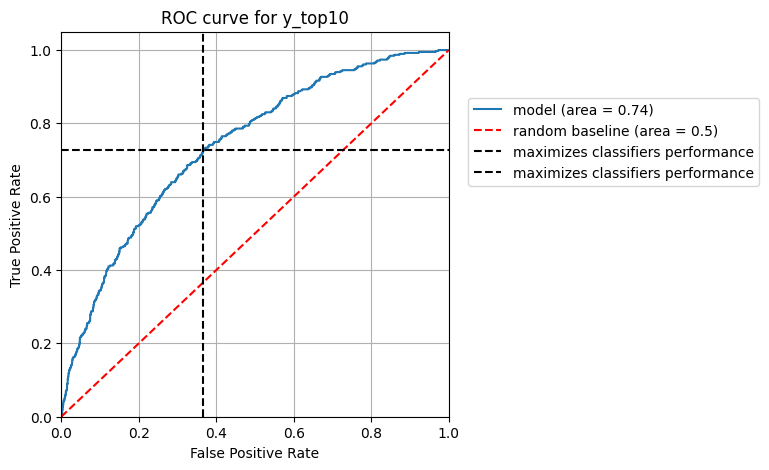

In [30]:
plot_roc_curve(y_true=df['top10'], y_pred_prob=df['top10_pred'])

In [31]:
fpr, tpr, thresholds = roc_curve(df['top10'], df['top10_pred'])
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

In [32]:
tn, fp, fn, tp = confusion_matrix(df['top10'], (df['top10_pred'] >= optimal_threshold).astype(int)).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(accuracy)

0.6444241316270567


In [33]:
recall = tp / (tp+fn)
print(recall)

0.7284595300261096


In [34]:
specificity = tn / (tn+fp)
print(specificity)

0.6333218351155571


In [41]:
x_cols = ['bpm', 'energy','danceability', 'loudness', 'valence', 'length', 'acousticness',
          'artist_seperation', 'ukrainian_lang', 'english_lang', 'other_lang',
          'spring_release', 'summer_release', 'winter_release', 'after2022',
          'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']

audio_features_to_test = ['bpm', 'energy','danceability', 'loudness', 'valence', 'length', 'acousticness']

full_formula = 'top10 ~ ' + ' + '.join(x_cols)

reduced_x_cols = [col for col in x_cols if col not in audio_features_to_test]
reduced_formula = 'top10 ~ ' + ' + '.join(reduced_x_cols)

full_model_fit = smf.logit(full_formula, data=df).fit(maxiter=1000, disp=False)
print(full_model_fit.summary())

reduced_model_fit = smf.logit(reduced_formula, data=df).fit(maxiter=1000, disp=False)
print(reduced_model_fit.summary())

llf_full = full_model_fit.llf
llf_reduced = reduced_model_fit.llf

print(f"\nLog-likelihood Full Model: {llf_full:.4f}")
print(f"Log-likelihood Reduced Model: {llf_reduced:.4f}")

lrt_statistic = -2 * (llf_reduced - llf_full)
print(f"\nCalculated LRT Statistic: {lrt_statistic:.4f}")

df_lrt = len(audio_features_to_test)
print(f"Degrees of Freedom for LRT: {df_lrt}")

p_value = chi2.sf(lrt_statistic, df_lrt)

print(f"Calculated P-value: {p_value:.15f}")

alpha = 0.05

if p_value < alpha:
    print(f"\nThe calculated p-value ({p_value:.4f}) is less than the significance level ({alpha}).")
    print("We reject the null hypothesis. This indicates that the audio features (as a group) significantly improve the model's fit.")
else:
    print(f"The calculated p-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}).")
    print("We fail to reject the null hypothesis. There is not enough evidence from this test to conclude that the audio features (as a group) significantly improve the model's fit.")

                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3262
Method:                           MLE   Df Model:                           19
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.1099
Time:                        13:22:44   Log-Likelihood:                -1052.5
converged:                       True   LL-Null:                       -1182.5
Covariance Type:            nonrobust   LLR p-value:                 2.958e-44
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -5.4097      0.914     -5.921      0.000      -7.200      -3.619
bpm                                  0.0033      0.002      1.445

In [43]:
interaction_vars_to_test = ['english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022']

reduced_x_cols_for_interaction_test = [col for col in x_cols if col not in interaction_vars_to_test]

reduced_formula_interaction_test = 'top10 ~ ' + ' + '.join(reduced_x_cols_for_interaction_test)


full_model_fit = smf.logit(full_formula, data=df).fit(disp=False)
print(full_model_fit.summary())

reduced_model_fit_interaction_test = smf.logit(reduced_formula_interaction_test, data=df).fit(disp=False)
print(reduced_model_fit_interaction_test.summary())

llf_full = full_model_fit.llf
llf_reduced_interaction_test = reduced_model_fit_interaction_test.llf

print(f"\nLog-likelihood Full Model: {llf_full:.4f}")
print(f"Log-likelihood Reduced Model (testing interactions): {llf_reduced_interaction_test:.4f}")

lrt_statistic_interaction_test = -2 * (llf_reduced_interaction_test - llf_full)
print(f"\nCalculated LRT Statistic (testing interactions): {lrt_statistic_interaction_test:.4f}")

df_lrt_interaction_test = len(interaction_vars_to_test)
p_value_interaction_test = chi2.sf(lrt_statistic_interaction_test, df_lrt_interaction_test)

print(f"Calculated P-value (testing interactions): {p_value_interaction_test:.10f}")

alpha = 0.05

if p_value_interaction_test < alpha:
    print(f"\nInterpretation (Testing Interactions): The calculated p-value ({p_value_interaction_test:.10f}) is less than the significance level ({alpha}).")
    print("We reject the null hypothesis for this test. This provides statistical evidence that the interaction terms ('english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022') are jointly significant.")
else:
    print(f"\nInterpretation (Testing Interactions): The calculated p-value ({p_value_interaction_test:.10f}) is greater than or equal to the significance level ({alpha}).")
    print("We fail to reject the null hypothesis for this test. There is not enough statistical evidence to conclude that the interaction terms are jointly significant, given the main effects are in the model.")

                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3262
Method:                           MLE   Df Model:                           19
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.1099
Time:                        13:23:14   Log-Likelihood:                -1052.5
converged:                       True   LL-Null:                       -1182.5
Covariance Type:            nonrobust   LLR p-value:                 2.958e-44
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -5.4097      0.914     -5.921      0.000      -7.200      -3.619
bpm                                  0.0033      0.002      1.445

In [44]:
variables_to_test = ['spring_release', 'summer_release', 'winter_release']

reduced_x_cols = [col for col in x_cols if col not in variables_to_test]
reduced_formula = 'top10 ~ ' + ' + '.join(reduced_x_cols)


full_model_fit = smf.logit(full_formula, data=df).fit(disp=False)
print(full_model_fit.summary())

reduced_model_fit = smf.logit(reduced_formula, data=df).fit(disp=False)
print(reduced_model_fit.summary())

llf_full = full_model_fit.llf
llf_reduced = reduced_model_fit.llf

print(f"\nLog-likelihood Full Model: {llf_full:.4f}")
print(f"Log-likelihood Reduced Model: {llf_reduced:.4f}")

lrt_statistic = -2 * (llf_reduced - llf_full)
print(f"\nCalculated LRT Statistic: {lrt_statistic:.4f}")

df_lrt = len(variables_to_test)
p_value = chi2.sf(lrt_statistic, df_lrt)

print(f"Calculated P-value: {p_value:.10f}")

alpha = 0.05

if p_value < alpha:
    print(f"\nInterpretation: The calculated p-value ({p_value:.10f}) is less than the significance level ({alpha}).")
    print("We reject the null hypothesis.")
else:
    print(f"\nInterpretation: The calculated p-value ({p_value:.10f}) is greater than or equal to the significance level ({alpha}).")
    print("We fail to reject the null hypothesis.")

                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3262
Method:                           MLE   Df Model:                           19
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.1099
Time:                        13:26:29   Log-Likelihood:                -1052.5
converged:                       True   LL-Null:                       -1182.5
Covariance Type:            nonrobust   LLR p-value:                 2.958e-44
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -5.4097      0.914     -5.921      0.000      -7.200      -3.619
bpm                                  0.0033      0.002      1.445